# Breast Cancer Analysis 

## Problem Statement:-
#### Breast cancer is one of the most common cancers among women worldwide. Early detection and accurate diagnosis play a crucial role in improving treatment outcomes and reducing mortality rates. Machine learning techniques can aid in the analysis of breast cancer data to assist healthcare professionals in diagnosis and prognosis.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Breast Cancer Dataset

In [2]:
df =pd.read_csv(r"C:\Users\VINAY\Downloads\archive (14).zip")

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Getting basic ideas of the Dataset

In [4]:
df.shape

(4024, 16)

In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

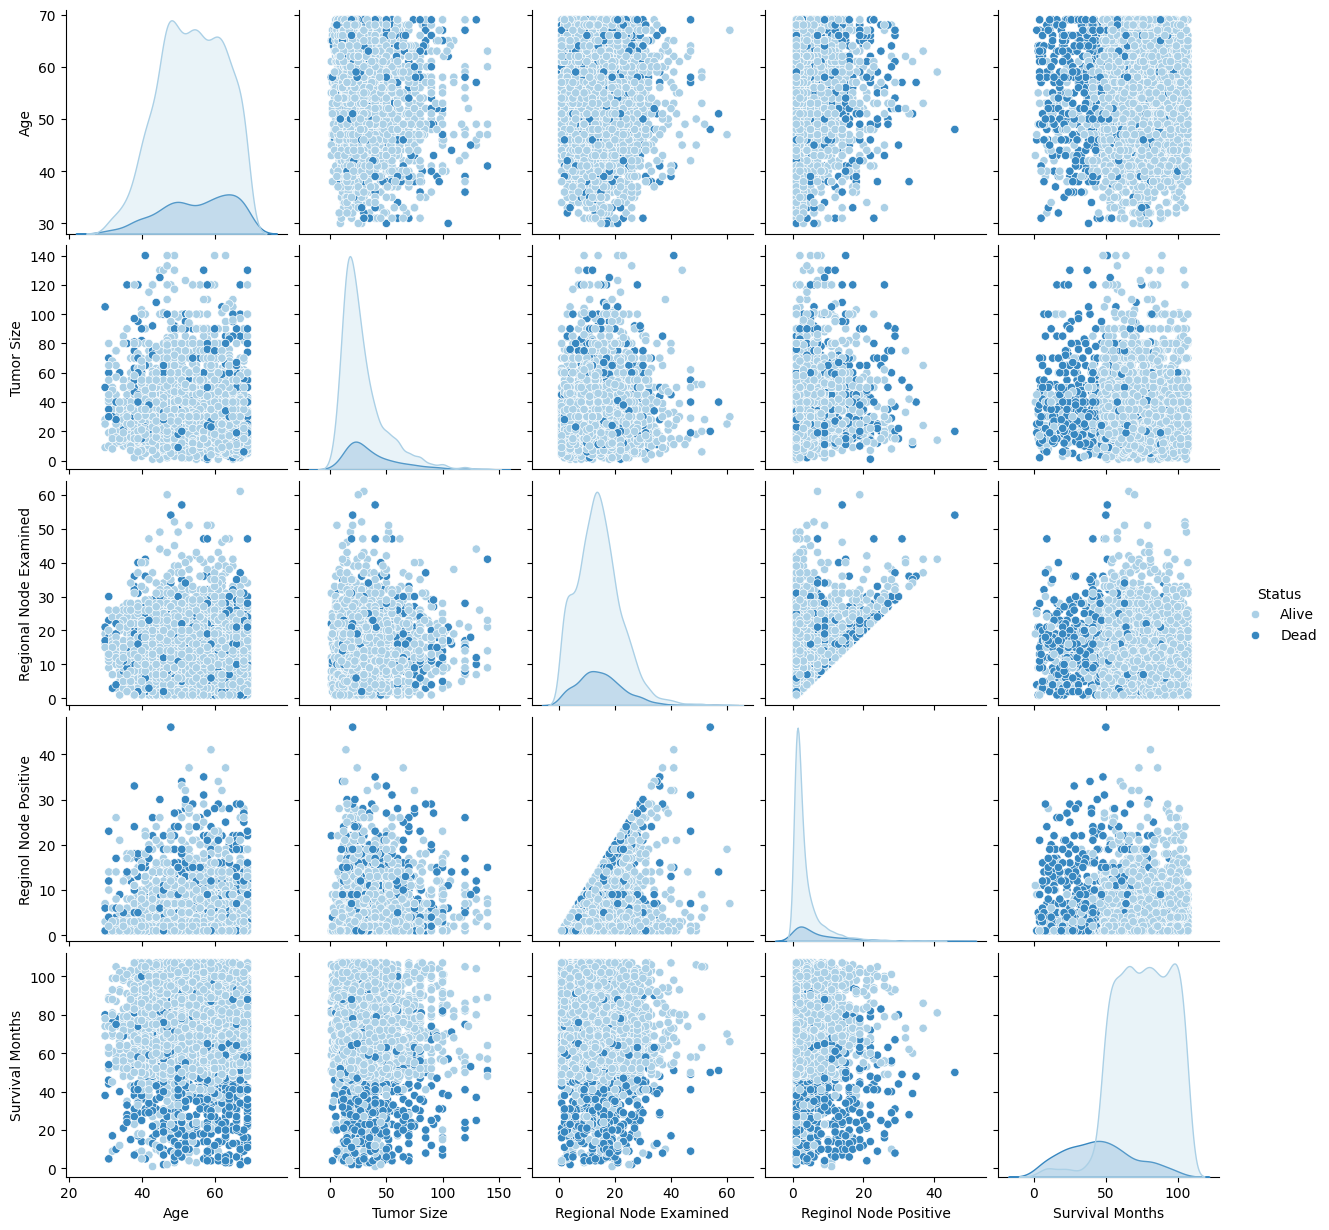

In [7]:
plt.rcParams['font.size'] = 10
sns.pairplot(df, hue = 'Status', palette = 'Blues')

## Data Visualization

#### 1. Distribution of ages of women with Breast Cancer

Text(0.5, 1.0, 'Distribution of Ages of Women with Breast Cancer')

<Figure size 1200x600 with 0 Axes>

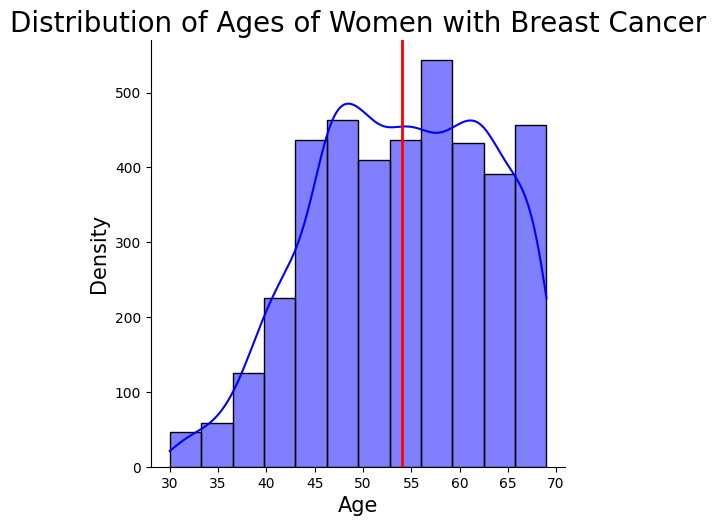

In [8]:
plt.figure(figsize = (12, 6))
median_age = df.Age.median()
sns.displot(df.Age,color = 'b', kde = True, bins = 12)
plt.axvline(median_age, color = 'red', linewidth = 2, label = 'Median Age')
plt.xlabel('Age', fontdict = {'fontsize':15})
plt.ylabel('Density', fontdict = {'fontsize':15})
plt.title("Distribution of Ages of Women with Breast Cancer", fontdict={'fontsize':20})

##### Ages between 45 to 68 are most suffer from Breast Cancer

In [9]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [10]:
df.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [11]:
#Replacing the anaplatic; Grade IV to 4 
df['Grade'] = df['Grade'].str.replace("anaplastic; Grade IV",'4')

#### 2. Size of the Tumour based on Grade

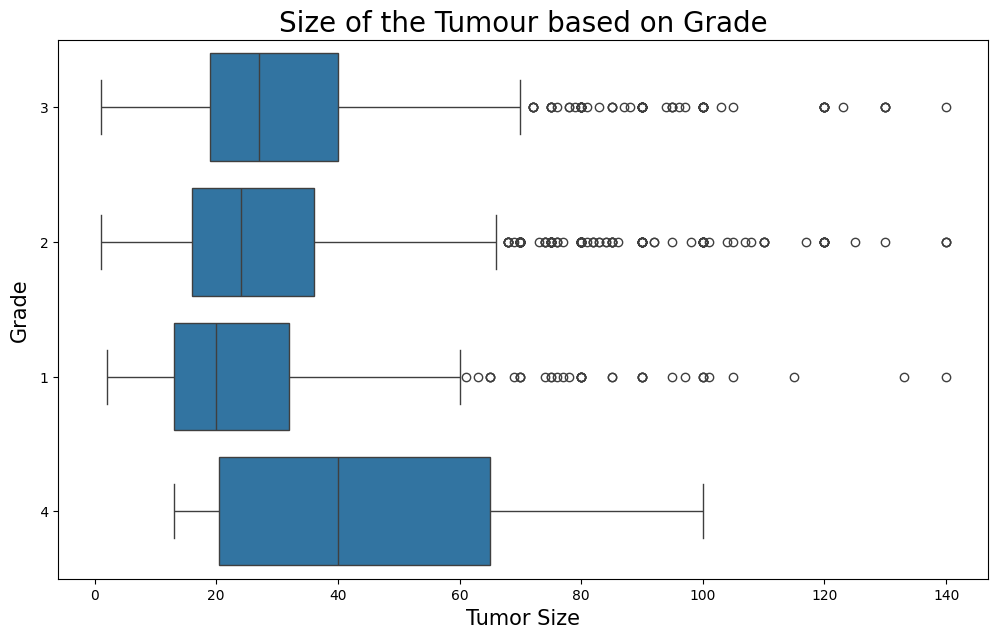

In [12]:
plt.figure(figsize = (12, 7))
plt.xlabel('Tumor Size', fontdict = {'fontsize':15})
plt.ylabel('Grade', fontdict = {'fontsize':15})
plt.title("Size of the Tumour based on Grade", fontdict = {'fontsize':20})
sns.boxplot(x = 'Tumor Size', y = 'Grade', data = df)
plt.show()

##### Patients in Grade 4 stage of braest cancer has bigger sized tumour compared to Grade 1,2 and 3

#### 3. Estrogen and Progesterone Status based on Grade on Breast Cancer

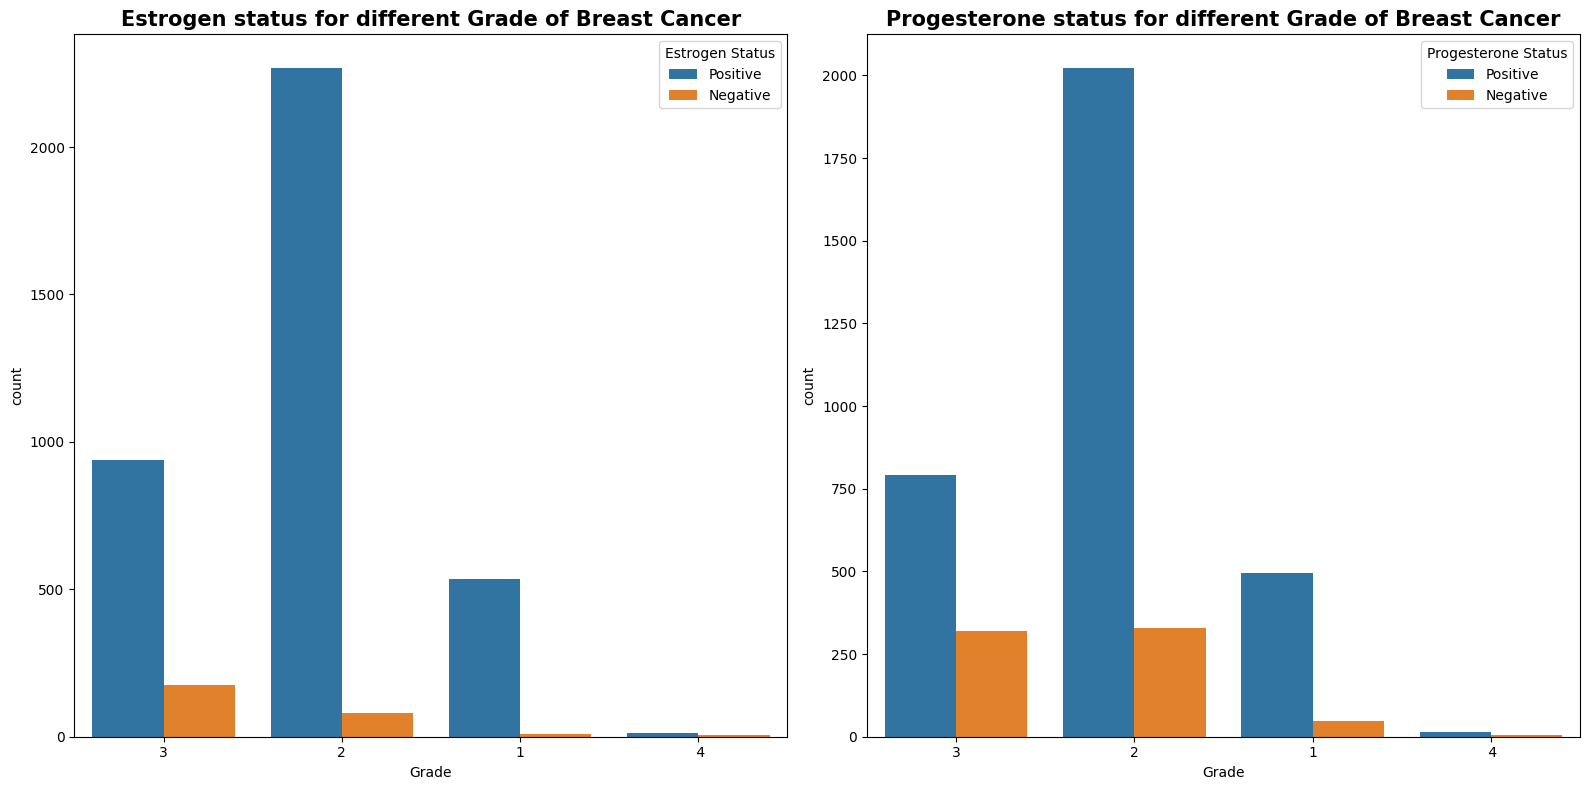

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# Plot countplot for 'Estrogen Status'
sns.countplot(x = 'Grade', hue = 'Estrogen Status', data = df, ax = axes[0])
axes[0].set_title("Estrogen status for different Grade of Breast Cancer",
                  fontweight = "bold", fontdict = {'fontsize': 15})

# Plot countplot for 'Progesterone Status'
sns.countplot(x = 'Grade', hue = 'Progesterone Status', data = df, ax = axes[1])
axes[1].set_title("Progesterone status for different Grade of Breast Cancer", fontweight = "bold", fontdict = {'fontsize': 15})

plt.tight_layout()   # Adjust subplot parameters to give specified padding
plt.show()   # Display the plots

#####  Grade 2 and 3 have more numbers of Estrogen and Progesterone Status

#### 4. Tumor Sizes for different Ages and Survival Month

Text(0.5, 1.0, 'Tumor Sizes for different Ages and Survival Month')

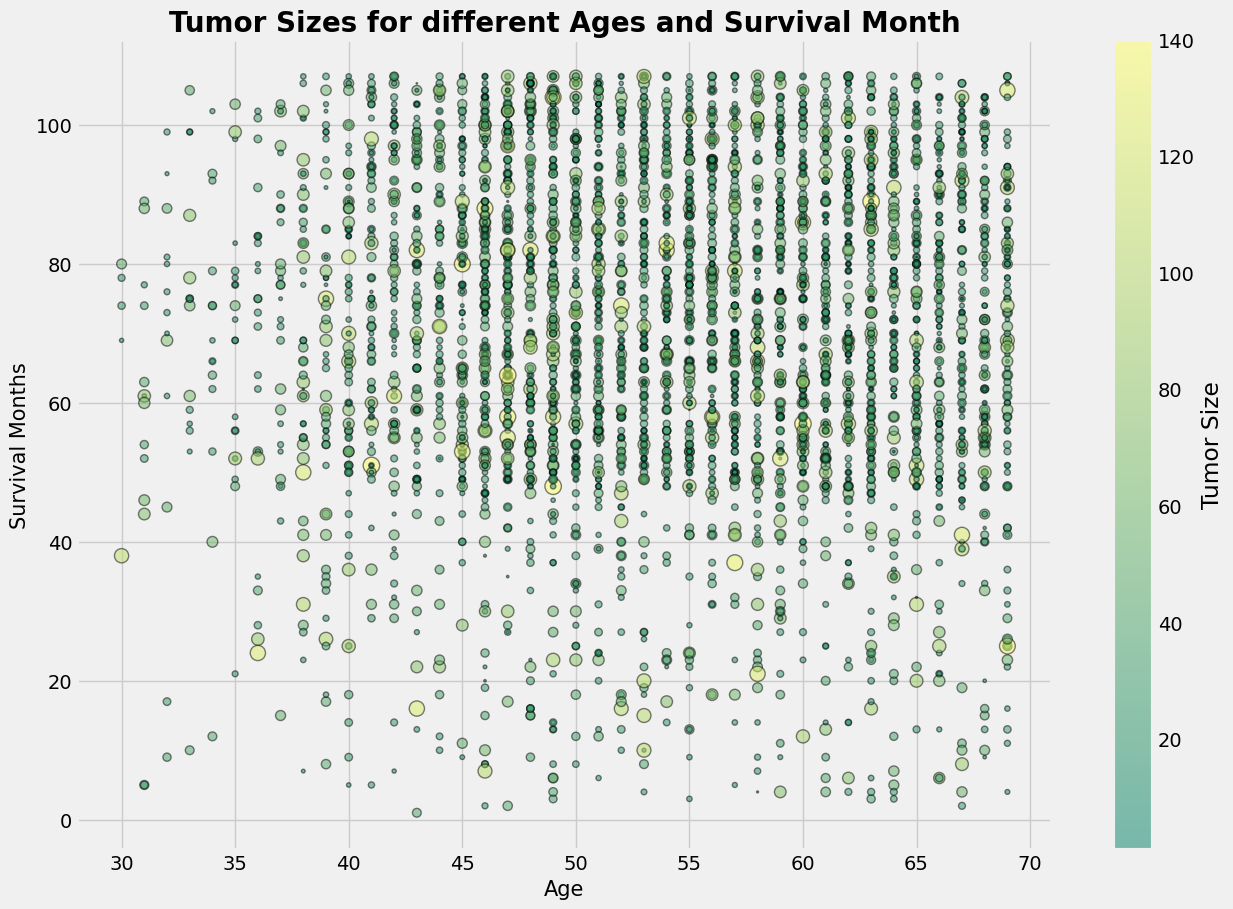

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,10))
plt.scatter(df.Age, df['Survival Months'], s=df['Tumor Size'], c=df['Tumor Size'], edgecolor='k',
            cmap = 'summer', alpha = 0.50, linewidth = 1)
plt.colorbar().set_label('Tumor Size')
plt.xlabel("Age", fontdict = {'fontsize': 15})
plt.ylabel("Survival Months", fontdict = {'fontsize': 15})
plt.title("Tumor Sizes for different Ages and Survival Month", fontdict = {'fontsize': 20},
          fontweight = "bold")

#### 5. Patient dead or alive based on Differentiation Status

Text(0.5, 1.0, 'Patient dead or alive based on Differentiation Status')

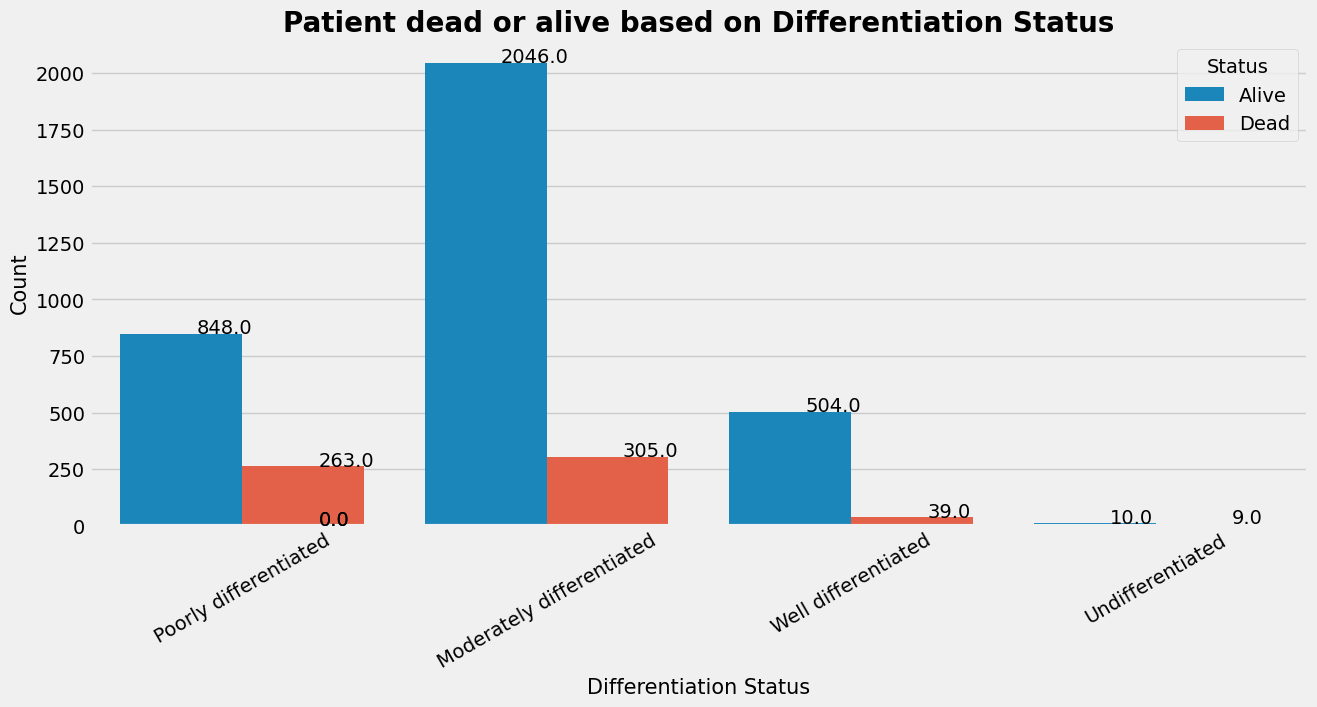

In [15]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x = 'differentiate', hue = 'Status', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 30)
plt.xlabel("Differentiation Status", fontdict = {'fontsize': 15})
plt.ylabel("Count", fontdict = {'fontsize': 15})
plt.title("Patient dead or alive based on Differentiation Status", fontdict = {'fontsize': 20},
          fontweight = "bold")

##### Patients having Poorly differentiated and Moderately differentiated tumor are more likely to dead than Well differentiated tumor. Patients having undifferebtiated tumor have nearly 50% chance of being dead.

#### 6. Distribution between Regional Node Examined and Regional Node Positive

Text(10.45833333333333, 0.5, 'Reginol Node Positive')

<Figure size 1000x1000 with 0 Axes>

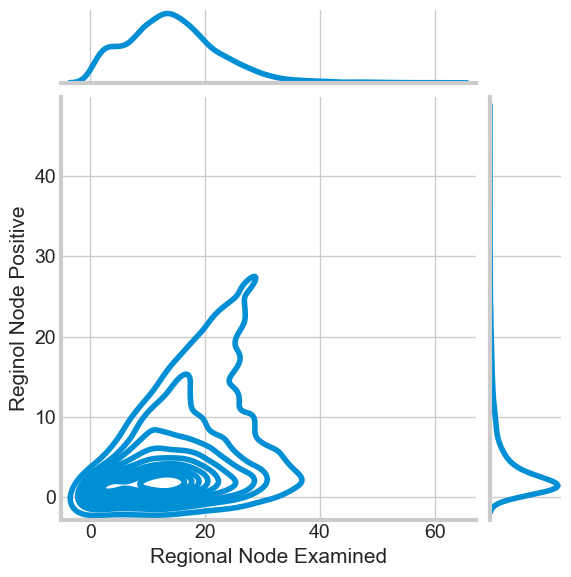

In [16]:
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
sns.jointplot(x = 'Regional Node Examined', y = 'Reginol Node Positive', data = df,  
              kind = 'kde', space = .2 )
plt.xlabel('Regional Node Examined', fontdict = {'fontsize':15})
plt.ylabel('Reginol Node Positive', fontdict = {'fontsize':15})


### Data Cleaning :

In [17]:
df.drop('Race', axis = 1, inplace = True)

In [18]:
df.drop('Marital Status', axis = 1, inplace=True )

In [19]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


<Axes: >

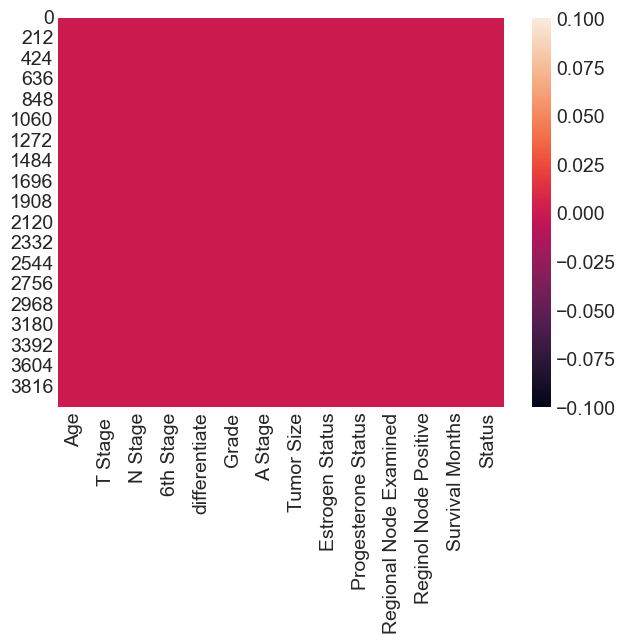

In [20]:
sns.heatmap(df.isnull()) #Data doesn't contain any Null values

In [21]:
df.isnull().sum()

Age                       0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

##### NOTE : All the columns are cleaned

In [22]:
df.shape

(4024, 14)

In [23]:
df.size

56336

In [24]:
df.nunique()

Age                        40
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

In [25]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [26]:
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

In [27]:
df

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,0
4020,56,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,0
4021,68,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,0
4022,58,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,0


In [28]:
df.reset_index(drop = True, inplace = True)

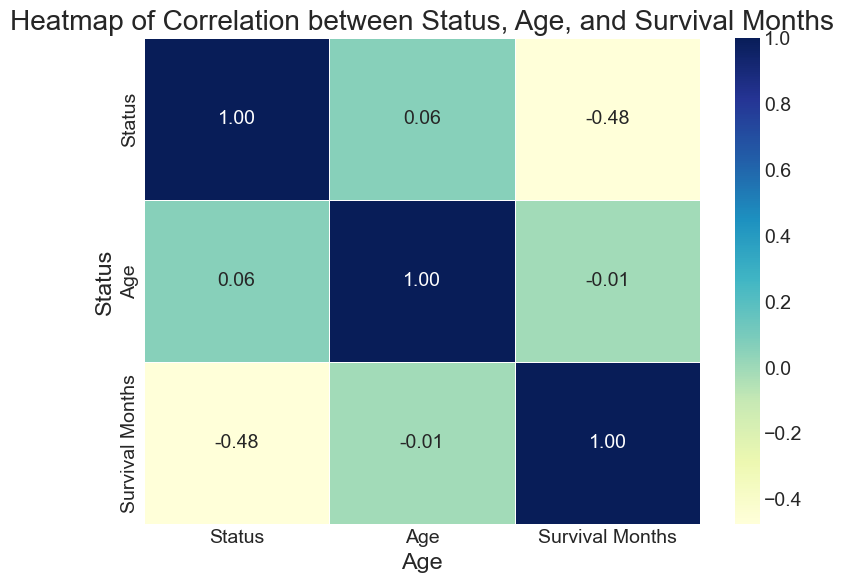

In [29]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Status', 'Age', 'Survival Months']].corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation between Status, Age, and Survival Months')
plt.xlabel('Age')
plt.ylabel('Status')
plt.show()

#### Observation: The heatmap suggests a positive correlation between age and survival months, implying that older individuals tend to have longer survival times.

C:\Users\VINAY\AppData\Local\Temp\ipykernel_24488\443889712.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Status', data = df, palette = 'Greens_d')


<Axes: xlabel='Status', ylabel='count'>

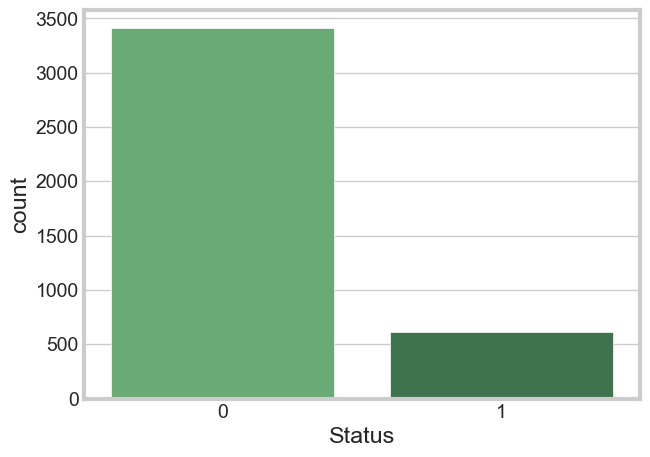

In [30]:
sns.countplot(x = 'Status', data = df, palette = 'Greens_d')

#### Observation: The count plot of the 'Status' column suggests that there is a noticeable imbalance between the number of individuals who are alive and those who are deceased in the dataset.
"Count" in the count plot tells us how many times each category appears in the 'Status' column. It shows us the number of people who are classified as "Alive" and the number of people who are classified as "Dead" in the dataset.

<Axes: xlabel='Age', ylabel='6th Stage'>

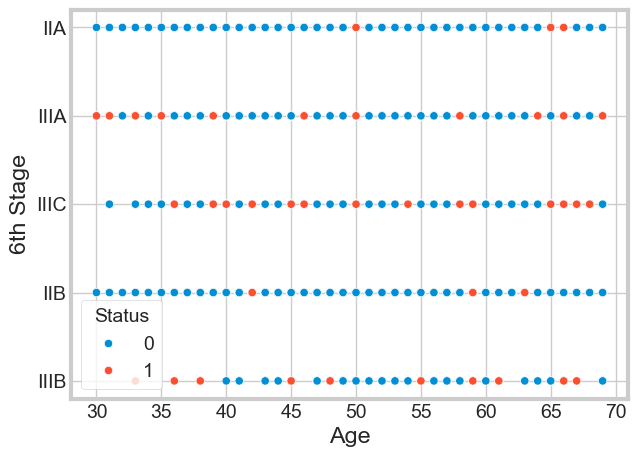

In [31]:
sns.scatterplot(x = 'Age', y ='6th Stage', data = df, hue = 'Status')

#### The scatter plot shows the relationship between age and the 6th stage, with points colored by status. It indicates that certain age groups have higher concentrations of specific 6th stage values, and there is variability in status across different stages, especially among older individuals.








<Axes: xlabel='Age', ylabel='Tumor Size'>

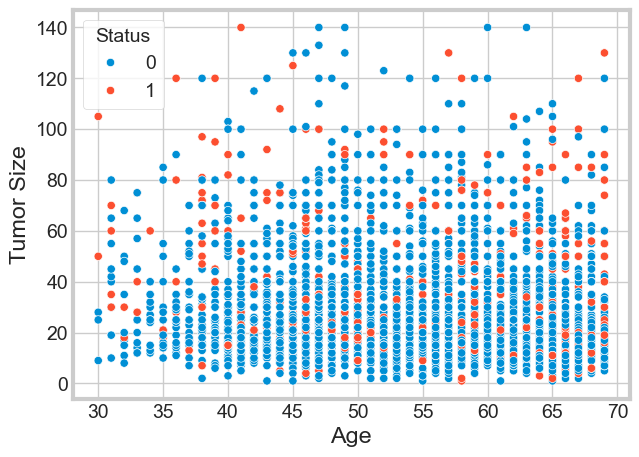

In [32]:
sns.scatterplot(x = 'Age', y = 'Tumor Size', data = df, hue = 'Status')

#### The scatter plot of 'Age' against 'Tumor Size', with points colored by 'Status', suggests that there may be a relationship between age, tumor size, and the status of individuals. However, no clear pattern or trend is immediately evident from the plot.

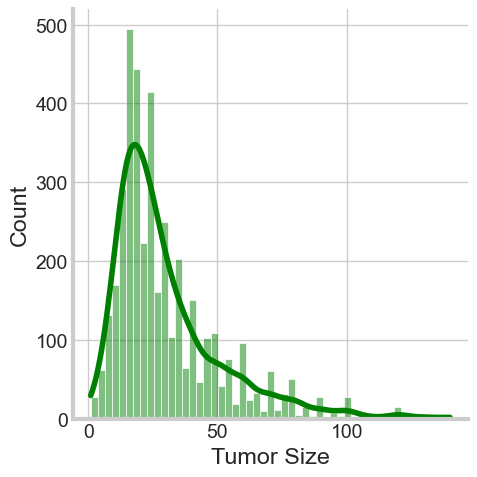

In [33]:
sns.displot(df['Tumor Size'], kde = True, color = 'g')

#### The distribution plot of 'Tumor Size' with kernel density estimation (KDE) shows the distribution of tumor size values in the dataset. The plot indicates the frequency or density of different tumor size values, with the KDE curve providing an estimate of the underlying probability density function. The color green is used for the plot.






